# Clase 2 - K-means y DBSCAN

## Configuración

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_moons

## K- Means

### Visualización de centroides antes y después de ejecutado el algoritmo

#### Con k bien escogido

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_34503/2402893408.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


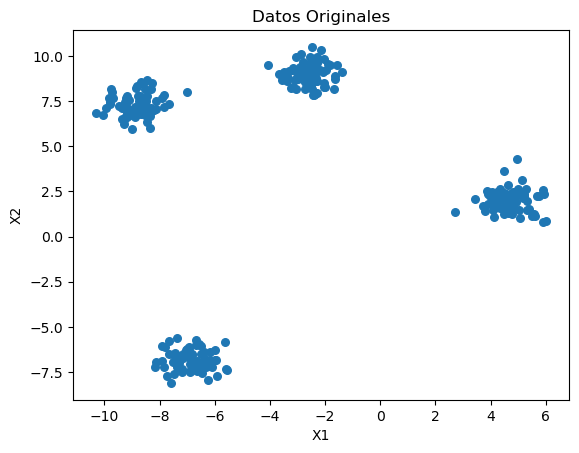

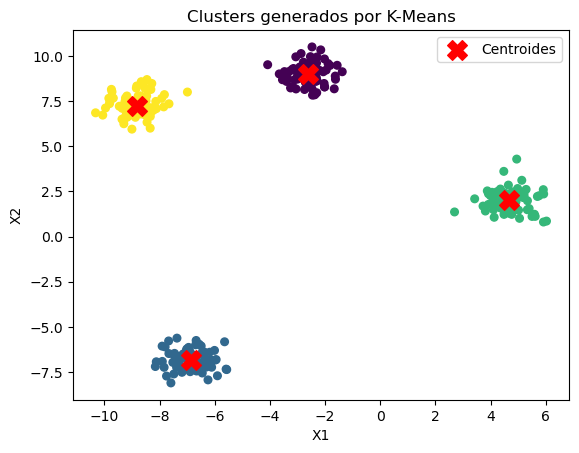

Silhouette Score: 0.88


In [2]:
# Generar datos de ejemplo
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualizar los datos originales
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Datos Originales")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Predecir etiquetas
y_kmeans = kmeans.predict(X)

# Visualizar los clusters generados por K-Means
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clusters generados por K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# Calcular métrica de Silhouette
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")


#### Con k mal escogido

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_34503/3135500852.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


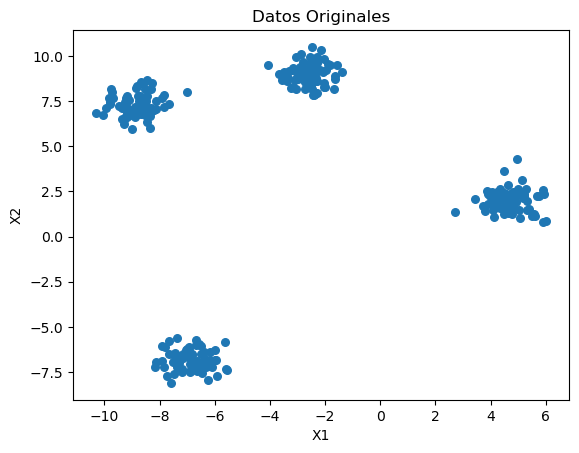

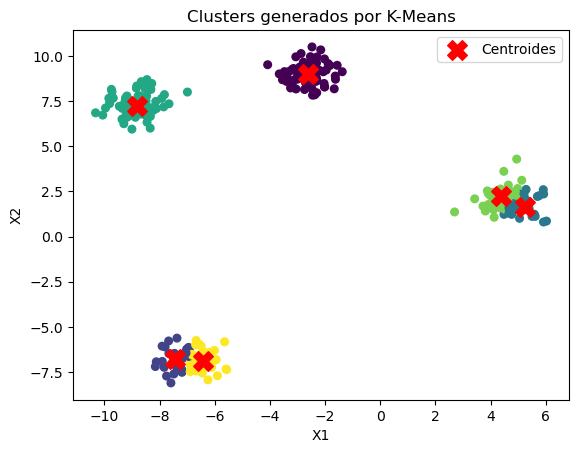

Silhouette Score: 0.59


In [3]:
# Generar datos de ejemplo
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualizar los datos originales
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Datos Originales")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Aplicar K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

# Predecir etiquetas
y_kmeans = kmeans.predict(X)

# Visualizar los clusters generados por K-Means
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clusters generados por K-Means")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

# Calcular métrica de Silhouette
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")

### Mecanismos de optimización para escoger el K

#### Conceptos

**1. ¿Qué mide la Inertia en K-Means?**

La **Inertia** es una medida interna de K-Means que cuantifica cómo de compactos están los clusters. Se define como la suma de las distancias cuadradas de cada punto a su centroide más cercano:

$$
\text{Inertia} = \sum_{i=1}^{N} \| x_i - c_{j} \|^2
$$

Donde:
- $N$ es el número total de puntos.
- $x_i$ es un punto de datos.
- $c_j$ es el centroide del cluster más cercano.

**Interpretación:**
- **Baja Inertia**: Los puntos están más cerca de sus centroides (clusters compactos).
- **Alta Inertia**: Los puntos están más dispersos respecto a sus centroides.

**Método del Codo:**
- La inertia disminuye a medida que aumenta el número de clusters ($K$).
- El punto donde la disminución de la inertia empieza a estabilizarse se conoce como el "codo" y se interpreta como el $K$ óptimo.

**Limitación:**
- La inertia siempre disminuye al aumentar $K$, por lo que no garantiza la calidad del clustering, solo mide compactación.

---

**2. ¿Qué mide el Silhouette Score?**

El **Silhouette Score** evalúa la calidad del clustering midiendo qué tan bien separados y compactos están los clusters. Su fórmula es:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Donde:
- $a(i)$: Distancia promedio entre un punto $i$ y los otros puntos del mismo cluster. (cohesión interna)
- $b(i)$: Distancia promedio entre un punto $i$ y los puntos del cluster más cercano al que no pertenece. (separación externa)

**Interpretación del Score:**
- **Silhouette Score** está en el rango $[-1, 1]$:
  - $s(i) \approx 1$: Puntos bien asignados a su cluster.
  - $s(i) \approx 0$: Puntos en el límite entre clusters.
  - $s(i) \approx -1$: Puntos asignados al cluster equivocado.

**Usos:**
- Se utiliza para evaluar qué tan bien definidos están los clusters.
- Se considera el mejor $K$ aquel que maximiza el **Silhouette Score**.

---

**Diferencias Clave:**

| **Métrica**        | **Qué mide**                                              | **Uso principal**                        |
|--------------------|----------------------------------------------------------|------------------------------------------|
| **Inertia**        | Compactación dentro de los clusters                      | Identificar $K$ con el "Método del Codo". |
| **Silhouette Score** | Separación entre clusters y cohesión interna            | Medir la calidad general del clustering. |

Ambas métricas son complementarias: 
- **Inertia** es útil para compactación, pero no garantiza buena separación.
- **Silhouette Score** evalúa tanto la compactación como la separación entre clusters.

#### Código

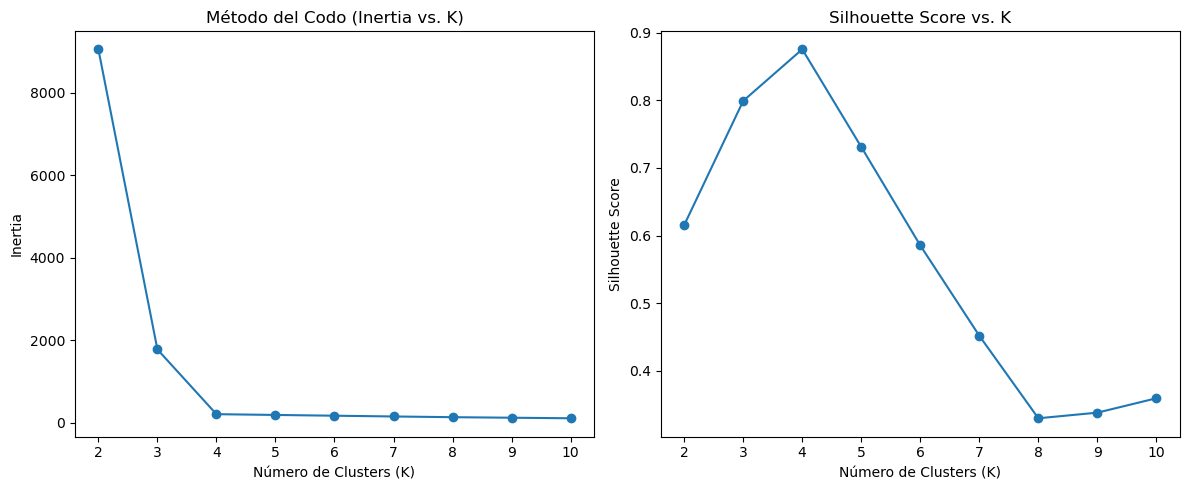

In [4]:
# Generar datos de ejemplo
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Calcular Inertia y Silhouette Score para diferentes valores de K
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Inertia
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

# Gráfico de Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## DBSCAN

### Algoritmo

**Definición de DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en densidad que identifica grupos de puntos densamente conectados y clasifica puntos aislados o con baja densidad como ruido. A diferencia de otros métodos como K-Means, no requiere especificar el número de clusters previamente y puede manejar clusters de formas arbitrarias.

**Funcionamiento de DBSCAN**

1. Parámetros principales:
   - $ \text{eps} $: Radio máximo para considerar que dos puntos son vecinos.
   - $ \text{min\_samples} $: Número mínimo de puntos requeridos para formar un cluster.

2. Conceptos clave:
   - **Punto núcleo**: Un punto con al menos $ \text{min\_samples} $ vecinos dentro del radio $ \text{eps} $.
   - **Punto borde**: Un punto que está dentro del radio $ \text{eps} $ de un núcleo, pero no cumple con el requisito de densidad para ser núcleo.
   - **Punto ruido**: Un punto que no es núcleo ni borde.

3. Pasos del algoritmo:
   - Para cada punto no visitado:
     - Si tiene al menos $ \text{min\_samples} $ vecinos dentro de $ \text{eps} $, se marca como núcleo y se expande un cluster.
     - Los puntos en el radio de un núcleo se asignan al mismo cluster.
   - Los puntos que no cumplen los criterios anteriores se clasifican como ruido.

4. Ventajas:
   - No requiere predefinir el número de clusters.
   - Maneja clusters de formas arbitrarias.
   - Identifica puntos de ruido en los datos.

5. Desventajas:
   - Sensible a los valores de $ \text{eps} $ y $ \text{min\_samples} $.
   - Escalabilidad limitada en datasets muy grandes, debido al cálculo de distancias.

**Fórmula utilizada en el cálculo de vecinos**

Para determinar si un punto $ i $ está en el radio de $ \text{eps} $ de otro punto $ j $, se utiliza la distancia euclidiana:

$
d(i, j) = \sqrt{\sum_{k=1}^{n} (x_{i, k} - x_{j, k})^2}
$


### Visualización de clusters

#### Explicación

**Dataset:**

* make_moons genera datos no lineales en forma de dos semicírculos.
* noise=0.05 añade variabilidad a los datos.

**DBSCAN:**

* eps=0.2: Define el radio máximo para considerar vecinos en el espacio de características.
* min_samples=5: Requiere un mínimo de 5 puntos para formar un cluster.

**Visualización:**

* Los clusters detectados se representan con colores distintos.
* Los puntos asignados como ruido se muestran con un color separado (generalmente negro).
* Este código puede ajustarse modificando los parámetros de DBSCAN (eps, min_samples) para analizar cómo cambian los resultados.

#### Código

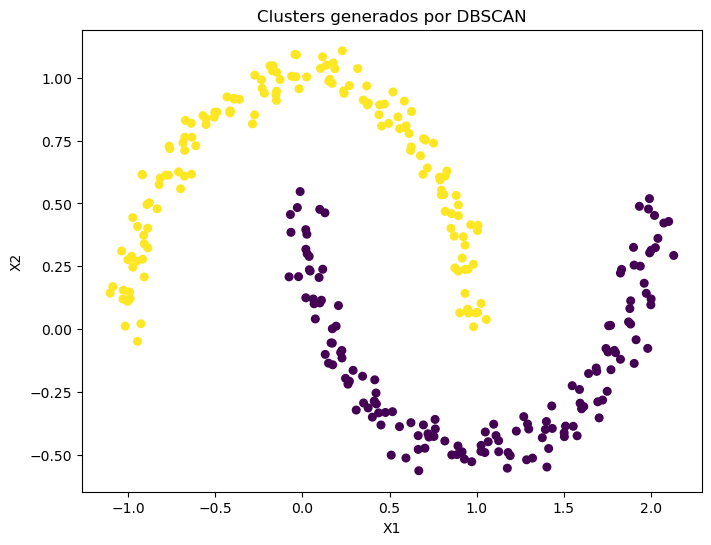

In [23]:
# Generar un dataset de ejemplo
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Visualizar los clusters generados por DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("Clusters generados por DBSCAN")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


### Ajustando los parámetros de DBSCAN

#### Cómo ajustar el parámetro eps en DBSCAN

##### Explicación

El parámetro $ \text{eps} $ en DBSCAN define el radio máximo para considerar que dos puntos son vecinos. Elegir un valor adecuado para $ \text{eps} $ es crucial, ya que afecta directamente la formación de clusters y la identificación de puntos de ruido.

**Pasos para ajustar eps**

1. **Calcular la distancia k-vecino más cercano**:
   - Para cada punto, calcular la distancia a su $ k $-ésimo vecino más cercano, donde $ k = \text{min\_samples} - 1 $.
   - Ordenar las distancias en orden ascendente.

2. **Generar una gráfica del k-vecino**:
   - Crear una gráfica con las distancias ordenadas en el eje y y el índice de puntos en el eje x.
   - Identificar el "codo" o punto de inflexión en la curva. Este valor corresponde a un buen valor para $ \text{eps} $.

##### Código para estimar eps con el k-vecino

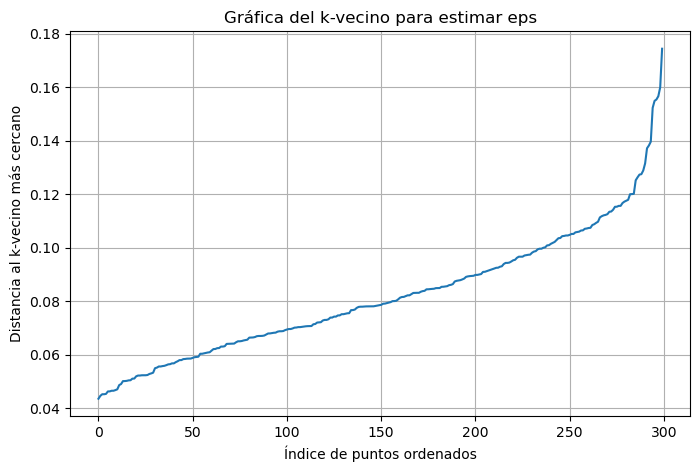

In [43]:
# Generar un dataset de ejemplo
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Configurar min_samples
min_samples = 5

# Ajustar el modelo de k-vecino más cercano
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, indices = nbrs.kneighbors(X)

# Ordenar las distancias
distances = np.sort(distances[:, -1])

# Graficar las distancias para estimar eps
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('Gráfica del k-vecino para estimar eps')
plt.xlabel('Índice de puntos ordenados')
plt.ylabel('Distancia al k-vecino más cercano')
plt.grid()
plt.show()

**Explicación del código para ajustar eps en DBSCAN**

El código presentado utiliza un dataset generado con `make_moons` para estimar el parámetro $ \text{eps} $ en DBSCAN mediante una gráfica de las distancias al $ k $-vecino más cercano.

1. Dataset:
   Se genera un conjunto de datos no lineales con 300 muestras y un nivel de ruido controlado de 0.05 usando `make_moons`. Este dataset es útil para evaluar cómo DBSCAN maneja clusters no esféricos.

   $ X, y = \text{make\_moons}(n\_samples=300, \text{noise}=0.05, \text{random\_state}=42) $

2. Cálculo del k-vecino más cercano:
   Se utiliza el modelo `NearestNeighbors` para calcular las distancias entre cada punto y sus $ k $-vecinos más cercanos. El valor de $ k $ se define como $ \text{min\_samples} $, que en este caso es 5. 

   $ \text{distances}, \text{indices} = \text{nbrs.kneighbors}(X) $

   - La matriz `distances` contiene las distancias al $ k $-vecino más cercano.
   - `indices` guarda los índices de los vecinos más cercanos.

3. Orden de las distancias:
   Las distancias al $ k $-vecino más cercano se ordenan de forma ascendente para facilitar la identificación del "codo" en la gráfica. Este punto de inflexión es el que determina un buen valor para $ \text{eps} $.

   $ \text{distances} = \text{np.sort}(\text{distances}[:, -1]) $

4. Gráfica del k-vecino:
   La gráfica resultante muestra cómo varían las distancias al $ k $-vecino más cercano. El "codo" en la curva representa el valor óptimo de $ \text{eps} $. En la gráfica:
   - El eje $ x $ muestra los índices de los puntos ordenados.
   - El eje $ y $ representa las distancias a los $ k $-vecinos más cercanos.

   $ \text{plt.plot}(\text{distances}) $

**Interpretación de la gráfica**

1. El "codo" es el punto donde las distancias comienzan a crecer rápidamente, lo que indica el valor de densidad que separa clusters densos del ruido.
2. Un $ \text{eps} $ menor al estimado puede producir más ruido y menos clusters.
3. Un $ \text{eps} $ mayor puede generar clusters grandes y menos definidos.

**Recomendaciones**

1. Usar la gráfica del k-vecino para estimar un valor inicial de $ \text{eps} $.
2. Ajustar ligeramente $ \text{eps} $ para obtener resultados óptimos en función de los datos. 


**Tarea en clase**

Crear el cluster usando lo entregado anteriormente

-0.03976440473107426


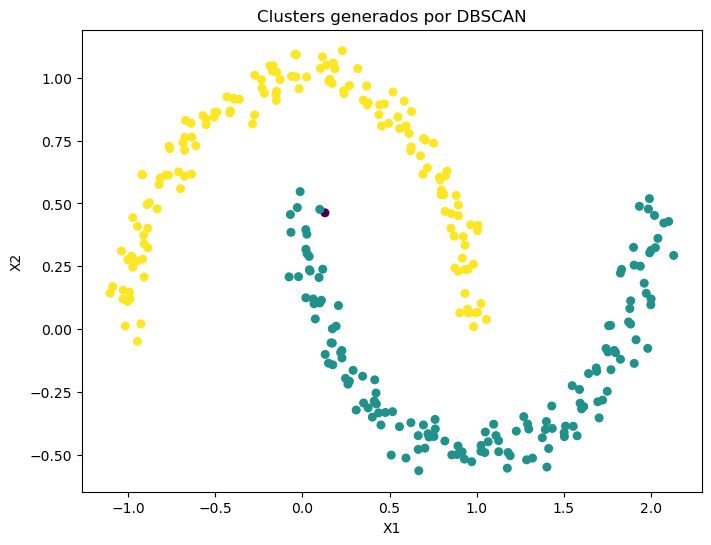

In [46]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.12, min_samples=5)
clusters = dbscan.fit_predict(X)

# Calculamos el Siboulette Score
score = silhouette_score(X, clusters)
print(score)
# Visualizar los clusters generados por DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=30)
plt.title("Clusters generados por DBSCAN")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#### Cómo ajustar min sample

El parámetro $ \text{min\_samples} $ define el número mínimo de puntos necesarios en el radio $ \text{eps} $ para que un punto se considere un núcleo del cluster. Ajustar este valor afecta directamente la cantidad de ruido identificado y la formación de clusters.

1. En datasets pequeños, es preferible utilizar un valor bajo, como $ 3 \leq \text{min\_samples} \leq 5 $.
2. En datasets más grandes, incrementar $ \text{min\_samples} $ ayuda a reducir el ruido y forma clusters más significativos.

**Método para ajustar min_samples**

1. Iterar sobre diferentes valores de $ \text{min\_samples} $.
2. Evaluar la calidad del clustering utilizando métricas como el **Silhouette Score**.

**Código para ajustar min_samples**

$ \text{eps} = 0.2 $  
$ \text{min\_samples\_range} = \text{range}(3, 15) $  

Para cada valor en $ \text{min\_samples\_range} $:  
- Entrenar DBSCAN con el valor de $ \text{min\_samples} $.  
- Evaluar el clustering usando el **Silhouette Score** si hay más de un cluster.  
- Guardar el mejor puntaje y el correspondiente $ \text{min\_samples} $.  

**Resultados esperados**

- Valores bajos de $ \text{min\_samples} $ identifican clusters pequeños y densos, pero incrementan el ruido.  
- Valores altos reducen el ruido, pero pueden perder clusters pequeños.  

**Recomendaciones finales**

1. Ajustar primero $ \text{eps} $ utilizando la gráfica del k-vecino.  
2. Optimizar $ \text{min\_samples} $ considerando la estructura y tamaño del dataset.  


In [47]:
eps = 0.12  # Usar el eps óptimo previamente estimado
min_samples_range = range(3, 15)
scores = []

for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    if len(set(clusters)) > 1:  # Evaluar solo si hay más de un cluster
        score = silhouette_score(X, clusters)
        scores.append((min_samples, score))

# Identificar el mejor min_samples
best_min_samples = max(scores, key=lambda x: x[1])
print(f"Mejor min_samples: {best_min_samples[0]} con Silhouette Score: {best_min_samples[1]:.4f}")

Mejor min_samples: 3 con Silhouette Score: 0.3308


#### Optimización usando param grid

In [49]:
# Definir un rango de valores para eps y min_samples
param_grid = {
    'eps': np.arange(0.05, 0.5, 0.01),
    'min_samples': range(1, 15, 1)
}

# Crear combinaciones de parámetros
grid = ParameterGrid(param_grid)

# Variable para almacenar los mejores parámetros y resultados
best_params = None
best_score = -1
results = []

# Iterar sobre todas las combinaciones de parámetros
for params in grid:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    clusters = dbscan.fit_predict(X)
    # Calcular el Silhouette Score solo si hay más de un cluster
    if len(set(clusters)) > 1 and -1 in clusters:
        score = silhouette_score(X, clusters)
        results.append((params['eps'], params['min_samples'], score))
        if score > best_score:
            best_score = score
            best_params = params

# Convertir resultados en un array para facilitar gráficos
results = np.array(results)

# Resultados óptimos
print(f"Mejores parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")

# Si quieres graficar, aquí tienes las variables:
# - results[:, 0]: eps
# - results[:, 1]: min_samples
# - results[:, 2]: silhouette scores


Mejores parámetros: {'eps': 0.11000000000000001, 'min_samples': 6}
Mejor Silhouette Score: 0.4300


#### Visualizamos la optimización

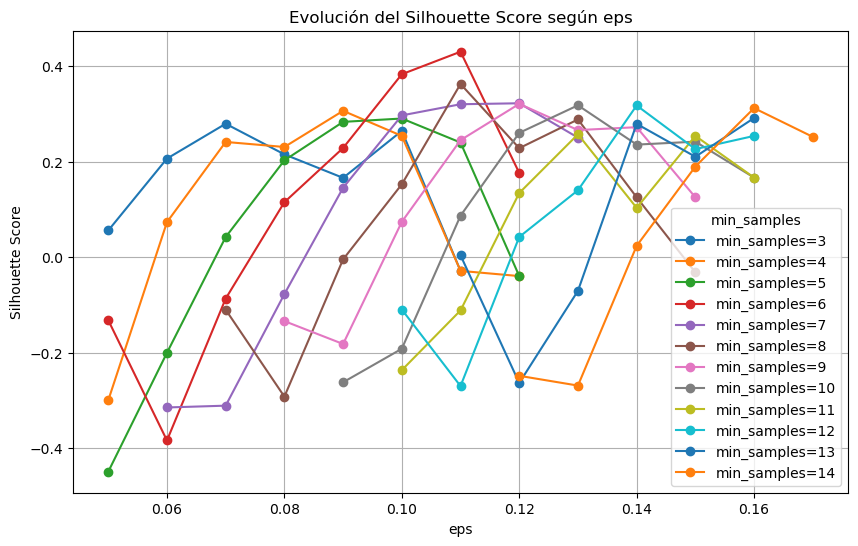

In [42]:
# Definir un rango de valores para eps y min_samples
param_grid = {
    'eps': np.arange(0.05, 0.5, 0.01),
    'min_samples': range(3, 15, 1)
}

# Crear combinaciones de parámetros
grid = ParameterGrid(param_grid)

# Variable para almacenar los resultados
results = []

# Iterar sobre todas las combinaciones de parámetros
for params in grid:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    clusters = dbscan.fit_predict(X)
    # Calcular el Silhouette Score solo si hay más de un cluster
    if len(set(clusters)) > 1 and -1 in clusters:
        score = silhouette_score(X, clusters)
        results.append((params['eps'], params['min_samples'], score))

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])

# Crear un gráfico para mostrar la evolución del Silhouette Score según 'eps'
plt.figure(figsize=(10, 6))
for min_samples_value in results_df['min_samples'].unique():
    subset = results_df[results_df['min_samples'] == min_samples_value]
    plt.plot(subset['eps'], subset['silhouette_score'], marker='o', label=f'min_samples={min_samples_value}')

plt.title('Evolución del Silhouette Score según eps')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.legend(title='min_samples')
plt.grid()
plt.show()
